**Table of contents**<a id='toc0_'></a>    
- [计算$\pi$](#toc1_1_)    
  - [斐波那契序列](#toc1_2_)    
    - [递归计算](#toc1_2_1_)    
    - [结果缓存（memoization）计算](#toc1_2_2_)    
    - [自动化的结果缓存](#toc1_2_3_)    
    - [迭代法计算](#toc1_2_4_)    
    - [生成器生成斐波那契数](#toc1_2_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[计算$\pi$](#toc0_)
采用莱布尼兹公式计算：$$\pi=4/1-4/3+4/5-4/7+4/9-4/11···$$
即以上无穷级数的收敛值等于$\pi$

In [1]:
# π = 4/1 − 4/3 + 4/5 − 4/7 + 4/9 − 4/11…
# 莱布尼兹公式
def calculate_pi(n_terms: int) -> float:
    numerator: float = 4.0
    denominator: float = 1.0
    operation: float = 1.0
    pi: float = 0.0
    for _ in range(n_terms):
        pi += operation * (numerator / denominator)
        denominator += 2.0
        operation *= -1.0
    return pi

if __name__ == "__main__":
    print(calculate_pi(1000000))

3.1415916535897743


## <a id='toc1_2_'></a>[斐波那契序列](#toc0_)
斐波那契序列（Fibonacci sequence）是一系列数字，其中除第1个和第2个数字之外，其
他数字都是前两个数字之和：
$$0, 1, 1, 2, 3, 5, 8, 13, 21, …$$
在此序列中，第1个斐波那契数是0。第4个斐波那契数是2。后续任一斐波那契数n的值可用以下公式求得：
$$fib(n) = fib(n − 1) + fib(n − 2)$$
### <a id='toc1_2_1_'></a>[递归计算](#toc0_)

In [3]:
def fib1(n: int) -> int:
    if n < 2:   # base case
        return n
    return fib1(n- 1)+ fib1(n- 2)

if __name__ == "__main__":
    print(fib1(5))

5


In [ ]:
if __name__ == "__main__":
    print(fib1(50))

>不要尝试运行fib1(50)，应为它计算几乎不会停止。

因为每次调用fib2()都会再调用两次`fib2()`，方式就是递归调用`fib2(n - 1)`和`fib2(n - 2)`。换句话说，这种树状调用结构将呈指数级增长。

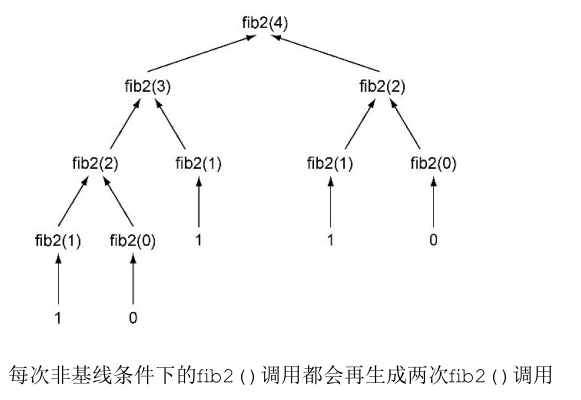

不妨来数一下（如果加入几次打印函数调用即可看明白），仅为了计算第4个元素就需要调用9次`fib2()`！情况会越来越糟糕，计算第5个元素需要调用15次，计算第10个元素需要调用117次，计算第20个元素需要调用21891次。


### <a id='toc1_2_2_'></a>[结果缓存（memoization）计算](#toc0_)
结果缓存（memoization）是一种缓存技术，即在每次计算任务完成后就把结果保存起来，这样在下次需要时即可直接检索出结果，而不需要一而再再而三地重复计算

In [5]:
"""利用python的字典对象作为结果缓存"""
from typing import Dict
memo:Dict[int, int] = {0: 0, 1: 1}  # our base cases

# 形参后的:为其注释，表示形参的类型
# ->为返回值的注释
def fib2(n: int) -> int:
    if n not in memo:   # base case
        memo[n] = fib1(n - 1) + fib1(n - 2)     # memoization
    return memo[n]

if __name__ == "__main__":
    print(fib2(1))
    print(fib2(5))
    print(fib2(10))
    print(fib2(50))

1
5
55
12586269025


>现在一次调用fib3(20)只会产生39次fib3()调用，而不会像调用fib2(20)那样产生21891次fib2()调用。memo中预填了之前的基线条件0和1，并加了一条if语句大幅降低了fib3()的计算复杂度。

### <a id='toc1_2_3_'></a>[自动化的结果缓存](#toc0_)
Python自带了一个内置的装饰器（decorator），可以**自动为任何函数缓存结果**。如代码清单所示，在`fib4()`中，装饰器`@functools.lru_cache()`所用的代码与`fib2()`中所用的代码完全相同。每次用新的参数执行`fib4()`时，该装饰器就会把返回值缓存起来。以后再用相同的参数调用`fib4()`，都会从缓存中读取该参数对应的`fib4()`之前的返回值并返回。

In [ ]:
from functools import lru_cache

# functool模块的lru_cache装饰器，maxsize为最多缓存次数
@lru_cache(maxsize=None)
def fib4(n: int) -> int:
    if n < 2:   # base case
        return n
    return fib4(n - 2) + fib4(n - 1)    # recursive case

if __name__ == "__main__":
    print(fib4(5))
    print(fib4(50))

### <a id='toc1_2_4_'></a>[迭代法计算](#toc0_)

In [6]:
def fib5(n: int) -> int:
    if n == 0:
        return n    # special case
    last: int = 0
    next0: int = 1
    
    # Tuple解包
    """要领就是last被设置为next的上一个值,
    next被设置为last的上一个值加上next的上一个值。
    这样在last已更新而next未更新时,就不用创建临时变量以存储next的上一个值了。"""
    
    for _ in range(1, n):
        last, next0 = next0, last + next0
    return next0

print(fib5(50))

12586269025


递归解决方案是反向求解，而迭代解决方案则是正向求解。有时递归是最直观的问题解决方案。例如，`fib1()`和`fib2()`的函数体几乎就是原始斐波那契公式的机械式转换。然而直观的递归解决方案也可能伴随着巨大的性能损耗。请记住，**能用递归方式求解的问题也都能用迭代方式来求解**。

### <a id='toc1_2_5_'></a>[生成器生成斐波那契数](#toc0_)
到目前为止，已完成的这些函数都只能输出斐波那契序列中的单个值。如果要将到某个值之前的**整个序列输出**，又该怎么做呢？**用`yield`语句很容易就能把`fib5()`转换为Python生成器**。在对生成器进行迭代时，每轮迭代都会用`yield`语句从斐波那契序列中吐出一个值

In [8]:
from typing import Generator

def fib6(n: int) -> Generator[int, None, None]:
    yield 0
    if n > 0:
        yield 1
    last: int = 0
    next: int = 1
    for _ in range(1, n):
        last, next = next, last + next
        yield next

if __name__ == "__main__":
    for i in fib6(13):
        print(i)

0
1
1
2
3
5
8
13
21
34
55
89
144
233


>for循环for i in fib6(50):每一次迭代时，fib6()都会一路运行至某条yield语句。如果直到函数的末尾也没遇到yield语句，循环就会结束迭代。